In [25]:
%autosave 10
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [4]:
df = pd.read_csv("cleaned_data.csv")

In [16]:
X =  df[["LIMIT_BAL"]]
y =  df["default payment next month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=63)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [19]:
lgr = LogisticRegression(random_state=63)
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=63, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [20]:
pred = lgr.predict(X_test)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [49]:
y_pred_proba = lgr.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.19894058, 0.44795437, 0.36420215, ..., 0.46523297, 0.36420215,
       0.26024477])

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

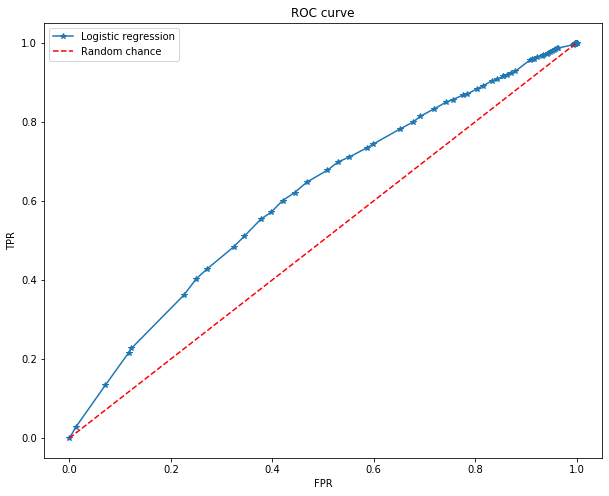

In [52]:
mpl.rcParams["figure.figsize"] = [10, 8]
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [53]:
metrics.roc_auc_score(y_test, pos_proba)

0.6129861391170799

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [54]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, ' Precision-Recall curve')

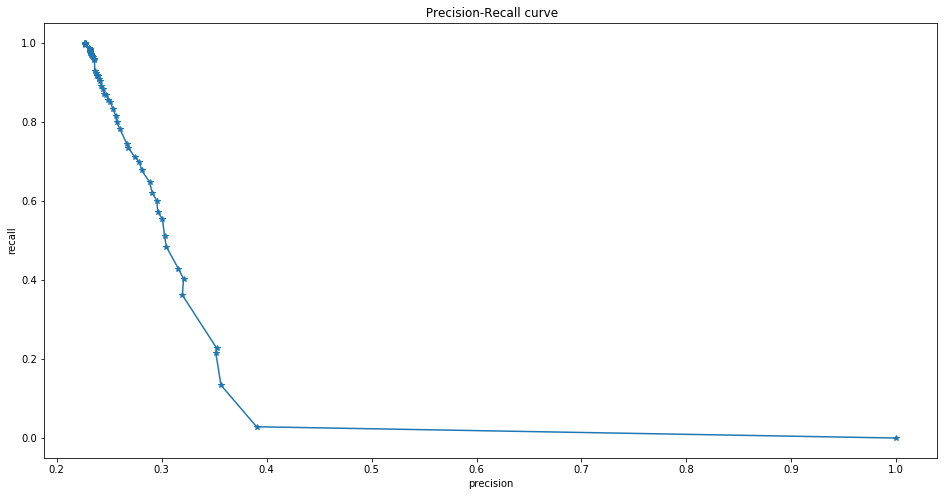

In [55]:
mpl.rcParams["figure.figsize"] = [16, 8]
plt.plot(precision, recall, '*-')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title(' Precision-Recall curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [59]:
metrics.auc(recall, precision)

0.31455910890303135

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [60]:
y_pred_proba = lgr.predict_proba(X_train)
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.36420215, 0.11714515, 0.41381116, ..., 0.36420215, 0.08564726,
       0.41381116])

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, pos_proba)

Text(0.5, 1.0, 'ROC curve')

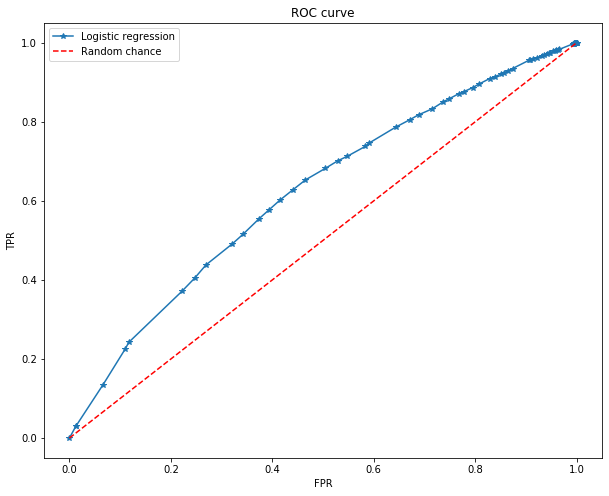

In [62]:
mpl.rcParams["figure.figsize"] = [10, 8]
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [63]:
metrics.roc_auc_score(y_train, pos_proba)

0.6215340110160108

    How is this different, conceptually and quantitatively, from your earlier calculation?
